#  Keras Intro: Fully Connected Models

Keras Documentation: https://keras.io

In this notebook we explore how to use Keras to implement Deep Fully Connected models

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

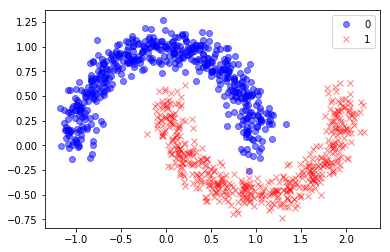

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

### Shallow Model

In [7]:
model = Sequential([
    Dense(1, input_shape=(2,), activation='sigmoid')
])
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 209us/sample - loss: 0.3186 - accuracy: 0.8400


In [10]:
results

[0.3185883647203445, 0.84]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.840


In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

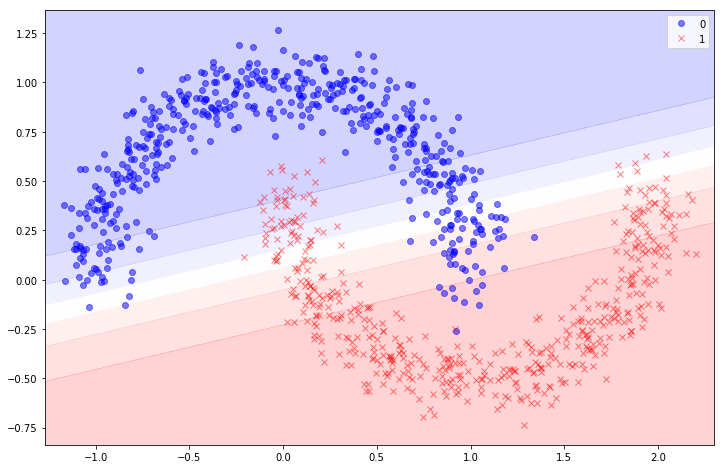

In [13]:
plot_decision_boundary(model, X, y)

### Deep model

In [14]:
model = Sequential([
    Dense(4, input_shape=(2,), activation='tanh'),
    Dense(2, activation='tanh'),
    Dense(1, activation='sigmoid')
])
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [16]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 229us/sample - loss: 0.0017 - accuracy: 1.0000


[0.0017194556863978506, 1.0]

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


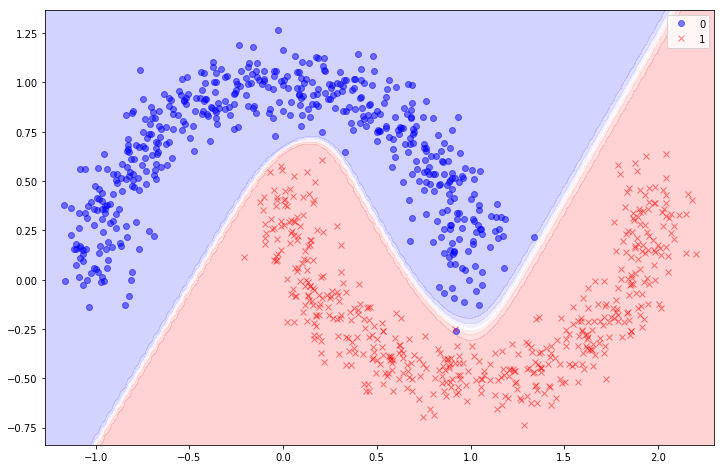

In [19]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [22]:
df = pd.read_csv('../data/iris.csv')

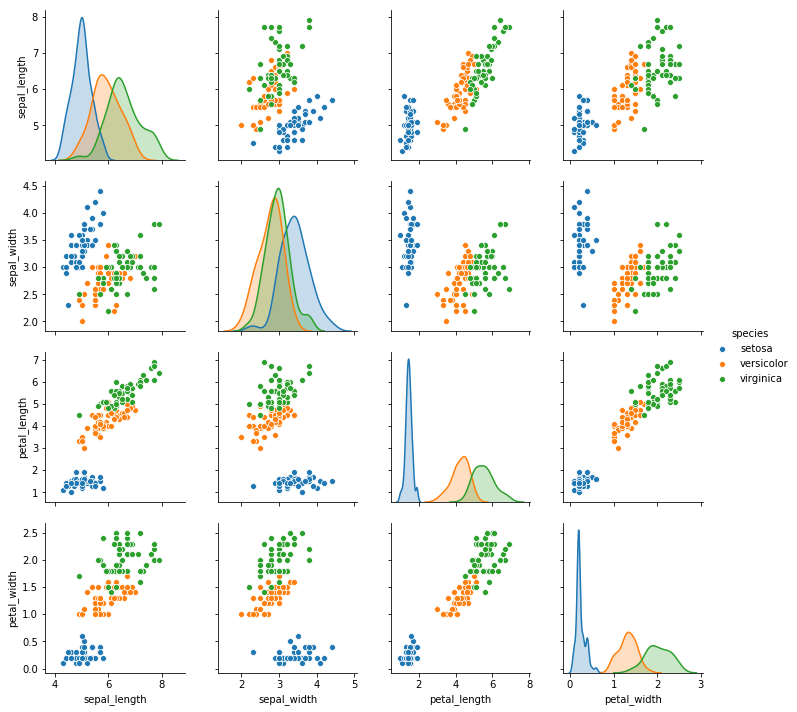

In [23]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [28]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [31]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s 2ms/sample - loss: 2.7192 - accuracy: 0.1574 - val_loss: 2.3307 - val_accuracy: 0.2500
Epoch 2/20
108/108 [==============================] - 0s 97us/sample - loss: 2.0228 - accuracy: 0.1389 - val_loss: 1.9356 - val_accuracy: 0.0000e+00
Epoch 3/20
108/108 [==============================] - 0s 109us/sample - loss: 1.3180 - accuracy: 0.3704 - val_loss: 0.8028 - val_accuracy: 0.5000
Epoch 4/20
108/108 [==============================] - 0s 155us/sample - loss: 0.7643 - accuracy: 0.7037 - val_loss: 0.8570 - val_accuracy: 0.5833
Epoch 5/20
108/108 [==============================] - 0s 149us/sample - loss: 0.6962 - accuracy: 0.7315 - val_loss: 0.5469 - val_accuracy: 0.7500
Epoch 6/20
108/108 [==============================] - 0s 108us/sample - loss: 0.5126 - accuracy: 0.8519 - val_loss: 0.5990 - val_accuracy: 0.7500
Epoch 7/20
108/108 [==============================] - 0s 190us/sample - loss: 

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred[:5]

array([[1.3572110e-04, 8.2453728e-02, 9.1741061e-01],
       [4.9456041e-02, 7.8545254e-01, 1.6509140e-01],
       [9.7490251e-01, 2.5074640e-02, 2.2917877e-05],
       [5.7688763e-04, 3.4879714e-01, 6.5062600e-01],
       [9.3176681e-01, 6.8062820e-02, 1.7037934e-04]], dtype=float32)

In [35]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [36]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [39]:
def pretty_confusion_matrix(y_true, y_pred, labels=target_names):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [41]:
pretty_confusion_matrix(y_test, y_pred_class)

,Predicted setosa,Predicted versicolor,Predicted virginica
setosa,11,0,0
versicolor,0,13,0
virginica,0,1,5
